In [47]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from PIL import Image
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split


In [2]:
fracture_dir = "/Users/azizulhaque/Desktop/Study Zone/RESEARCH/Bone Fracture/Bone fracture dataset/Bone fracture dataset/Dataset/fracture"
normal_dir = "/Users/azizulhaque/Desktop/Study Zone/RESEARCH/Bone Fracture/Bone fracture dataset/Bone fracture dataset/Dataset/normal"

In [3]:
print("Fracture images:", os.listdir(fracture_dir)[:3])
print("Normal images:", os.listdir(normal_dir)[:3]) 

Fracture images: ['348.png', '1804.png', '1810.png']
Normal images: ['374.png', '88.png', '77.png']


In [23]:
# Count images in each directory
num_fracture_images = len(os.listdir(fracture_dir))
num_normal_images = len(os.listdir(normal_dir))

print("Number of fracture images:", num_fracture_images)
print("Number of normal images:", num_normal_images)

Number of fracture images: 2000
Number of normal images: 127


In [24]:

# Get paths for the first two fracture images
fracture_images = os.listdir(fracture_dir)[:2]
img1_path = os.path.join(fracture_dir, fracture_images[0])
img2_path = os.path.join(fracture_dir, fracture_images[1])

# Get paths for the first two normal images
normal_images = os.listdir(normal_dir)[:2]
img3_path = os.path.join(normal_dir, normal_images[0])
img4_path = os.path.join(normal_dir, normal_images[1])

# Open all four images
img1 = Image.open(img1_path)
img2 = Image.open(img2_path)
img3 = Image.open(img3_path)
img4 = Image.open(img4_path)


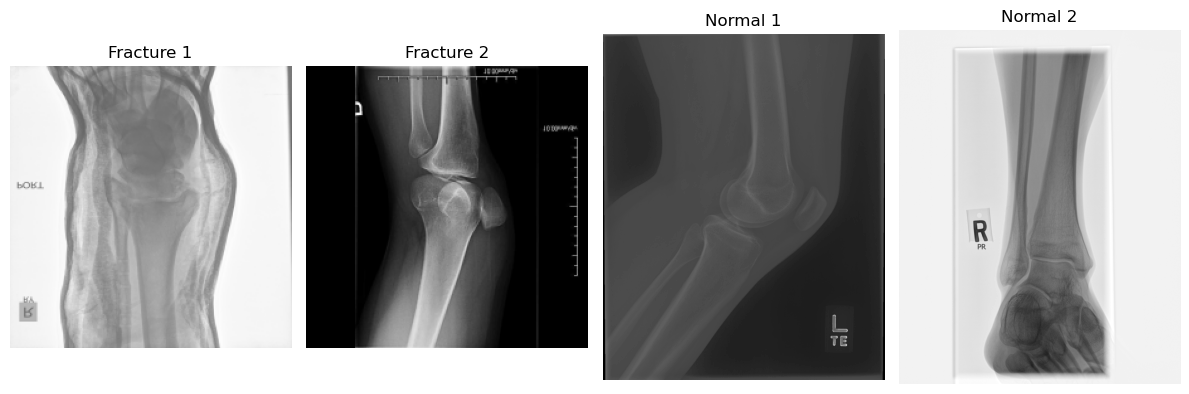

In [25]:
# Plot the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(img1, cmap='gray')
plt.title("Fracture 1")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(img2, cmap='gray')
plt.title("Fracture 2")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(img3, cmap='gray')
plt.title("Normal 1")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(img4, cmap='gray')
plt.title("Normal 2")
plt.axis("off")

plt.tight_layout()
plt.show()

In [26]:
# Resize all images to 224x224
img1 = img1.resize((224, 224))
img2 = img2.resize((224, 224))
img3 = img3.resize((224, 224))
img4 = img4.resize((224, 224))

# Convert all images to NumPy arrays
img1_array = np.array(img1)
img2_array = np.array(img2)
img3_array = np.array(img3)
img4_array = np.array(img4)


In [27]:
print("Fracture image 1 shape:", img1_array.shape)
print("Fracture image 2 shape:", img2_array.shape)
print("Normal image 1 shape:", img3_array.shape)
print("Normal image 2 shape:", img4_array.shape)

Fracture image 1 shape: (224, 224, 3)
Fracture image 2 shape: (224, 224, 3)
Normal image 1 shape: (224, 224)
Normal image 2 shape: (224, 224)


In [38]:
data = []
labels = []

def load_images_from_dir(directory, label):
    count = 0
    for file in os.listdir(directory):
        path = os.path.join(directory, file)
        try:
            with Image.open(path) as img:
                img = img.convert("RGB").resize((224, 224))
                arr = np.array(img)
                if arr.shape == (224, 224, 3):
                    data.append(arr)
                    labels.append(label)
                    count += 1
                else:
                    print(f"Skipped {file} due to unexpected shape: {arr.shape}")
        except Exception as e:
            print(f"Failed to load {file}: {e}")
    print(f"Loaded {count} images from {directory}")

# Load both sets
load_images_from_dir(fracture_dir, label=1)
load_images_from_dir(normal_dir, label=0)

print("Total images loaded:", len(data))
print("Label distribution:", {0: labels.count(0), 1: labels.count(1)})


Loaded 2000 images from /Users/azizulhaque/Desktop/Study Zone/RESEARCH/Bone Fracture/Bone fracture dataset/Bone fracture dataset/Dataset/fracture
Loaded 127 images from /Users/azizulhaque/Desktop/Study Zone/RESEARCH/Bone Fracture/Bone fracture dataset/Bone fracture dataset/Dataset/normal
Total images loaded: 2127
Label distribution: {0: 127, 1: 2000}


In [39]:
# Convert image to RGB to make all shapes consistent
img = Image.open(path).convert("RGB").resize((224, 224))


In [40]:
img = Image.open(path).convert("RGB").resize((224, 224))


In [41]:
X = np.array(data)
y = np.array(labels)


In [42]:
print("Total images loaded:", len(data))
print("Label distribution:", {0: labels.count(0), 1: labels.count(1)})


Total images loaded: 2127
Label distribution: {0: 127, 1: 2000}


In [43]:
# Step 6: Normalize pixel values to range [0, 1]
X = X.astype("float32") / 255.0

print("X min:", X.min(), "| X max:", X.max())


X min: 0.0 | X max: 1.0


In [44]:
# Convert to NumPy arrays
X = np.array(data)
y = np.array(labels)

# Train-test split (20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 1701
Testing samples: 426


In [48]:
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Helps reduce overfitting
model.add(Dense(1, activation='sigmoid'))  # Use 1 neuron for binary classification


/Users/azizulhaque/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [50]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 293ms/step - accuracy: 0.9059 - loss: 35.3713 - val_accuracy: 0.9507 - val_loss: 0.1712
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 290ms/step - accuracy: 0.9365 - loss: 0.2228 - val_accuracy: 0.9460 - val_loss: 0.1215
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 298ms/step - accuracy: 0.9490 - loss: 0.1663 - val_accuracy: 0.9577 - val_loss: 0.1319
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 300ms/step - accuracy: 0.9457 - loss: 0.2371 - val_accuracy: 0.9484 - val_loss: 0.7575
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 296ms/step - accuracy: 0.9509 - loss: 0.2258 - val_accuracy: 0.9531 - val_loss: 0.1476
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 300ms/step - accuracy: 0.9533 - loss: 0.1799 - val_accuracy: 0.9531 - val_loss: 0.1423
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 302ms/step - accuracy: 0.9541 - loss: 0.1402 - val_accuracy: 0.9577 - val_loss: 0.0995
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step - accuracy: 0.9545 - loss: 0.1306 - val_acc

In [51]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9739 - loss: 0.0960 
Test accuracy: 0.9647887349128723


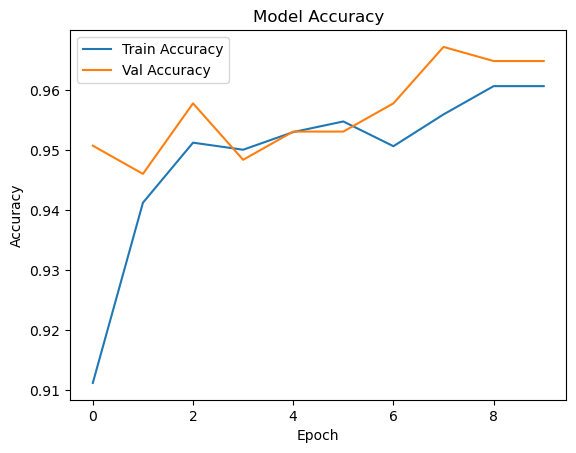

In [52]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step 


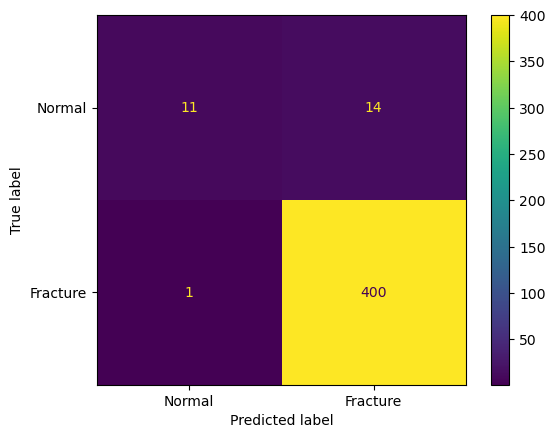

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # binary classification

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Fracture"])
disp.plot()


In [55]:
model.save("bone_fracture_cnn_model.keras")


In [56]:
# Count in training set
train_fracture = np.sum(y_train == 1)
train_normal = np.sum(y_train == 0)

# Count in test set
test_fracture = np.sum(y_test == 1)
test_normal = np.sum(y_test == 0)

# Print the results
print("Training set:")
print(f"  Fracture images: {train_fracture}")
print(f"  Normal images:   {train_normal}")

print("\nTesting set:")
print(f"  Fracture images: {test_fracture}")
print(f"  Normal images:   {test_normal}")

Training set:
  Fracture images: 1599
  Normal images:   102

Testing set:
  Fracture images: 401
  Normal images:   25


In [57]:
TP = 400
TN = 11
FP = 14
FN = 1

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy: 0.96
Precision: 0.97
Recall: 1.00
F1 Score: 0.98
